# Ensemble Methods and Gradient Boosting

Ensemble methods are machine learning techniques that combine multiple models to improve predictive performance. The idea is to leverage the strengths of individual models and minimize their weaknesses by aggregating their outputs.

---

## Gradient Boosting

### Overview
Gradient Boosting is a type of boosting algorithm that builds models iteratively. Each new model is trained to minimize the **loss** of the ensemble by correcting the errors of previous models. The model sort of **learns the error** every iteration. It works well for both classification and regression tasks.

### Key Idea
The core idea is to train weak learners (typically decision trees) on the residual errors (differences between actual and predicted values) of the ensemble model. The algorithm improves step by step by reducing these errors.

---
## Mathematical Formulation

Let:
- $y_i$: Actual target value for data point $i$.
- $\hat{y}_i^{(t)}$: Predicted value after $t$-th iteration.

### Basic Formulation of the Procedure

1. **Initialize** the model with a constant value:
   $$
   \hat{y}_i^{(0)} = \text{average}(y)
   $$

2. **Compute Residuals**:
   For iteration $t$, compute the errors as:
   $$
   \text{error}^{(t)} = y_i - \hat{y}_i^{(t-1)}
   $$

3. **Fit a Weak Learner**:
   Train a decision tree $h_t(x)$ on the errors $\text{error}_i^{(t)}$.

4. **Update the Predictions**:
   Add the contribution of the new tree to the ensemble:
   $$
   \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + h_t(x_i)
   $$

5. **Repeat**:
   Iterate steps 2–4 for $T$ iterations.


### Generalized Version With More Parameters

- $L(y, \hat{y})$: Loss function (e.g., mean squared error for regression, log-loss for classification).
- $r_i^{(t)}$: Residuals (error)
- $\eta$: Learning Rate


1. **Initialize** the model with a constant value:
   $$
   \hat{y}_i^{(0)} = \text{argmin}_c \sum_{i=1}^n L(y_i, c)
   $$

2. **Compute Residuals**:
   For iteration $t$, compute the residuals (negative gradients of the loss function):
   $$
   r_i^{(t)} = -\frac{\partial L(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i}
   $$

3. **Fit a Weak Learner**:
   Train a decision tree $h_t(x)$ on the residuals $r_i^{(t)}$.

4. **Update the Predictions**:
   Add the contribution of the new tree to the ensemble:
   $$
   \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta \cdot h_t(x_i)
   $$
   Here, $\eta$ is the learning rate, which controls the contribution of each tree.

5. **Repeat**:
   Iterate steps 2–4 for $T$ iterations.

### Final Prediction
For regression:
$$
\hat{y}_i = \sum_{t=1}^T \eta \cdot h_t(x_i)
$$

For classification:
$$
\hat{y}_i = \text{argmax}_c \sum_{t=1}^T \eta \cdot h_t(x_i)
$$

---

## Advantages of Gradient Boosting

- **Handles Nonlinear Relationships**: Decision trees can model complex patterns in data.
- **Customizable Loss Functions**: Can optimize for different objectives (e.g., mean squared error, log-loss).
- **Feature Importance**: Provides insight into which features are most relevant.

---

## Limitations

- **Computational Cost**: Training can be slow for large datasets or many iterations.
- **Overfitting**: Can overfit if too many iterations or very deep trees are used.
- **Requires Careful Tuning**: Hyperparameters like the learning rate, number of trees, and tree depth need to be set appropriately.

---

## Other Types of Ensemble Methods

1. **Bagging**:
   - Example: Random Forests.
   - Combines predictions from multiple models trained on different subsets of the data (created using bootstrap sampling).
   - Reduces variance and helps prevent overfitting.

2. **Other Types of Boosting**:
   - AdaBoost Boosting: Focuses on hard-to-predict samples by iteratively adjusting their weights to build a strong classifier.
   - XGBoost (Extreme Gradient Boosting): A highly optimized, regularized version of Gradient Boosting known for speed and accuracy — *xgboost is a python library*
   - CatBoost: Specifically designed to handle categorical data efficiently, reducing the need for extensive preprocessing while delivering high performance.

3. **Stacking**:
   - Combines the predictions of several models (base learners) using a meta-model, (often a simple linear model).

---




## Gradient Boosting on a Linear function with Noise

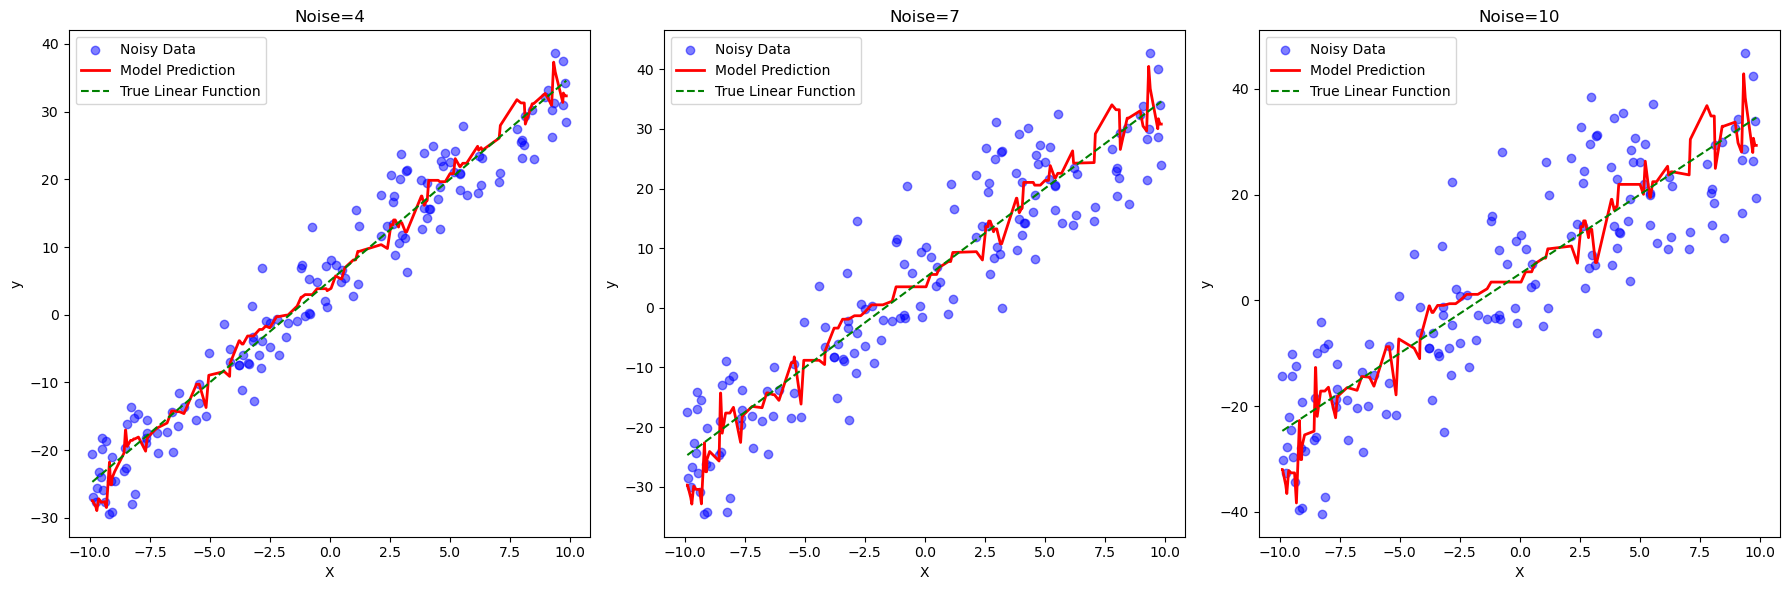

Root Mean Squared Error (RMSE) for noise=4: 4.49
Root Mean Squared Error (RMSE) for noise=7: 7.81
Root Mean Squared Error (RMSE) for noise=10: 11.08


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a linear function with noise
def generate_linear_data(n_samples, noise, random_state):
    np.random.seed(random_state)
    X = np.random.uniform(-10, 10, size=(n_samples, 1))  # Features
    y = 3 * X.ravel() + 5 + np.random.normal(0, noise, n_samples)  # Linear relationship with noise
    return X, y

# Generate datasets with increasing noise levels
datasets = [
    generate_linear_data(n_samples=500, noise=noise, random_state=42)
    for noise in [4, 7, 10]
]

# Prepare the figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Initialize a list to store the mean squared errors
mse_list = []

# Loop over datasets and noise levels
for i, (X, y) in enumerate(datasets):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train a Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Sort the test data for plotting
    sorted_idx = np.argsort(X_test.ravel())
    X_test_sorted = X_test[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    
    # Plot the noisy data and the model's predictions
    axs[i].scatter(X_test, y_test, color='blue', alpha=0.5, label='Noisy Data')
    axs[i].plot(X_test_sorted, y_pred_sorted, color='red', label='Model Prediction', linewidth=2)
    axs[i].plot(X_test_sorted, 3 * X_test_sorted + 5, color='green', linestyle='--', label='True Linear Function')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Noise={4 + 3 * (i)}')
    axs[i].legend()
    
    # Calculate and store the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Calculate and print RMSE
rmse_list = [np.sqrt(mse) for mse in mse_list]
for i, rmse in enumerate(rmse_list):
    print(f"Root Mean Squared Error (RMSE) for noise={4 + 3 * i}: {rmse:.2f}")



Our model definitely overfits for the noisier data. The red line is generally close to the green line, though which is what we are looking for.

## Now For Noisy Nonlinear Data

We will try gradient boosting for some nonlinear data. It our model's ability to graph strange shapes that makes our model shine.

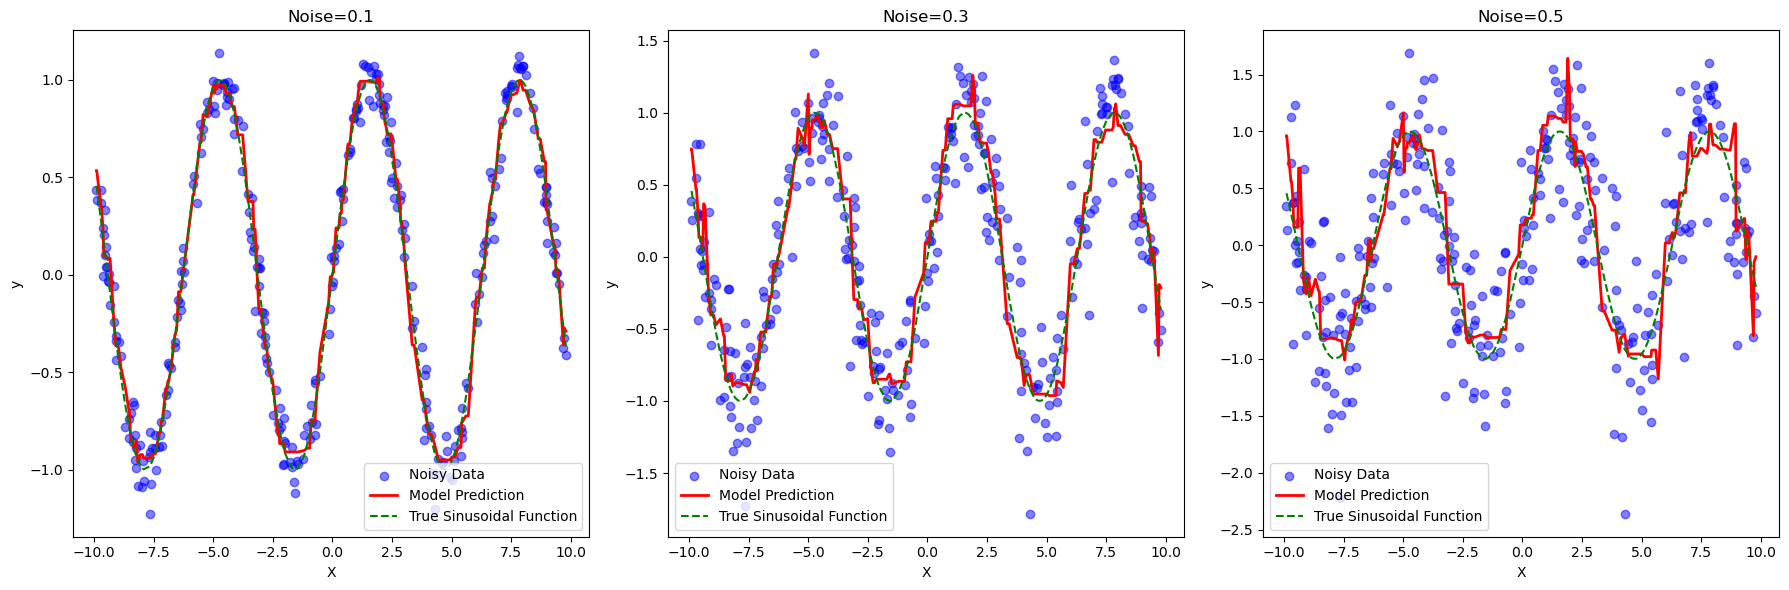

Root Mean Squared Error (RMSE) for noise=0.1: 0.112
Root Mean Squared Error (RMSE) for noise=0.3: 0.310
Root Mean Squared Error (RMSE) for noise=0.5: 0.517


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate nonlinear (sinusoidal) data with noise
def generate_nonlinear_data(n_samples, noise, random_state):
    np.random.seed(random_state)
    X = np.random.uniform(-10, 10, size=(n_samples, 1))  # Features
    y = np.sin(X).ravel() + np.random.normal(0, noise, n_samples)  # Sinusoidal relationship with noise
    return X, y

# Generate datasets with increasing noise levels
datasets = [
    generate_nonlinear_data(n_samples=1000, noise=noise, random_state=42)
    for noise in [0.1, 0.3, 0.5]
]

# Prepare the figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Store the MSE for each iteration
mse_values = []

# Loop over datasets and noise levels
for i, (X, y) in enumerate(datasets):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train a Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Sort the test data for plotting
    sorted_idx = np.argsort(X_test.ravel())
    X_test_sorted = X_test[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    
    # Plot the noisy data and the model's predictions
    axs[i].scatter(X_test, y_test, color='blue', alpha=0.5, label='Noisy Data')
    axs[i].plot(X_test_sorted, y_pred_sorted, color='red', label='Model Prediction', linewidth=2)
    axs[i].plot(X_test_sorted, np.sin(X_test_sorted), color='green', linestyle='--', label='True Sinusoidal Function')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Noise={round(0.1 + (0.2 * i), 1)}')
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Calculate and print RMSE
rmse_values = [np.sqrt(mse) for mse in mse_values]
for i, rmse in enumerate(rmse_values):
    print(f"Root Mean Squared Error (RMSE) for noise={round(0.1 + (0.2 * i), 1)}: {rmse:.3f}")


**Not too shabby.** Our model is definitely overfitting though, especially on the noisiest dataset. We can tune the parameters (learning rate, max depth) to try and get closer fits. Let's try to get a better fit. We will automatically do this by running a loop that checks for the error across multiple values for the parameters.

## Tuning Our Gradient Booster

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2}


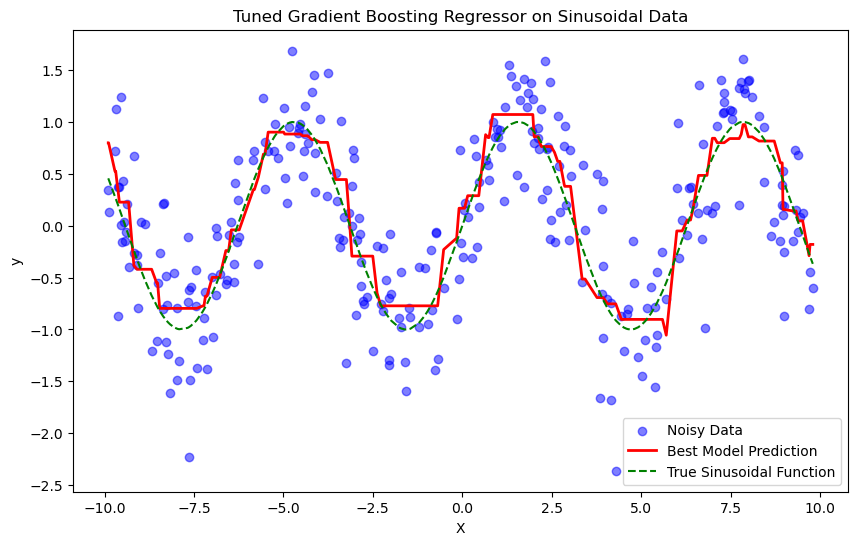

Root Mean Squared Error (RMSE): 0.50


In [57]:

X, y = generate_nonlinear_data(n_samples=1000, noise=0.5, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
}

# Grid search for the best parameters
grid_search = GridSearchCV(
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Predict on test data
y_pred = best_model.predict(X_test)

# Plot the test data and model predictions
sorted_idx = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Noisy Data')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Best Model Prediction', linewidth=2)
plt.plot(X_test_sorted, np.sin(X_test_sorted), color='green', linestyle='--', label='True Sinusoidal Function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Tuned Gradient Boosting Regressor on Sinusoidal Data')
plt.legend()
plt.show()

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


**Wow, that's a great fit!** Our model tried with 80 different fits and found this one to be the best (`learning_rate = 0.1`, `max_depth = 2`). It is true that some of this could be luck due to the randomness of the data. If we run the gradient booster on a different random state, it will likely have higher RMSE:

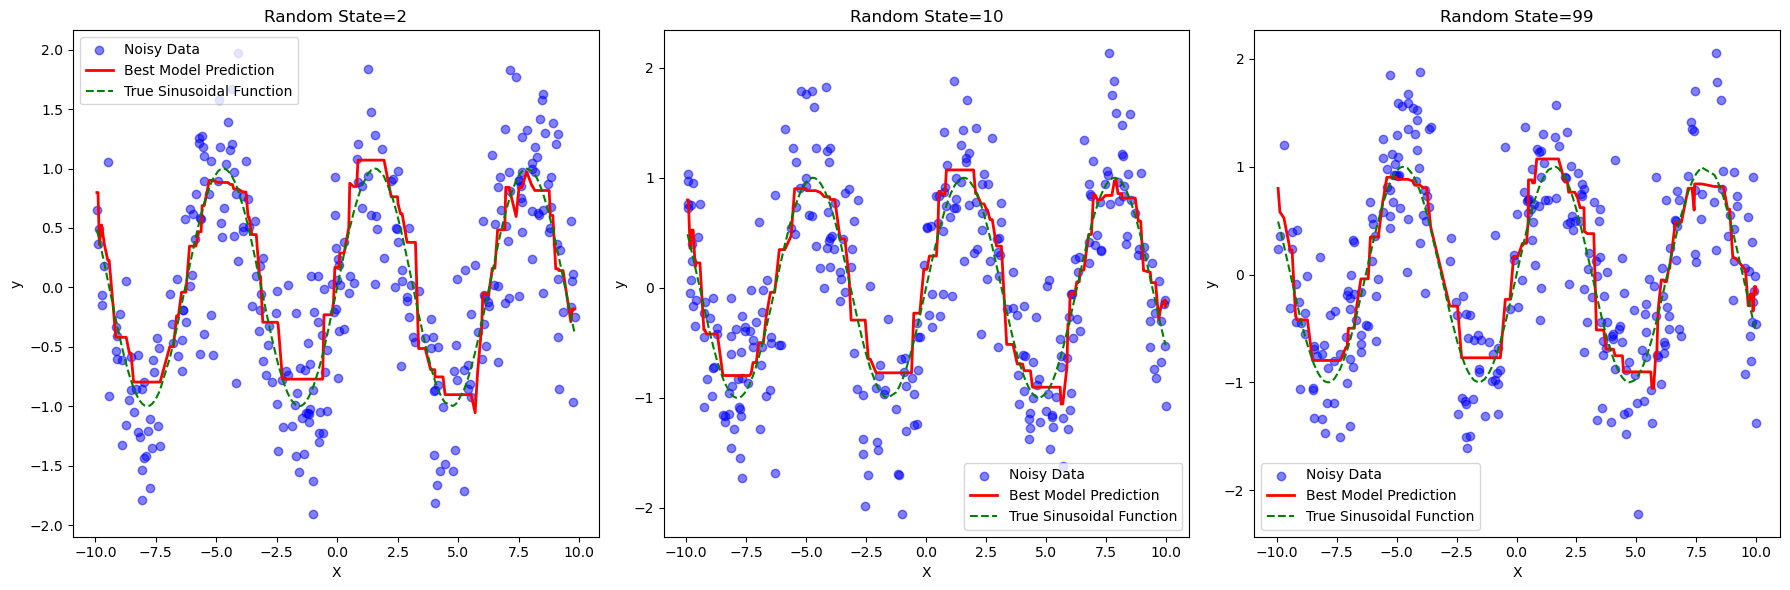

Root Mean Squared Error (RMSE) for random state=2: 0.52
Root Mean Squared Error (RMSE) for random state=10: 0.52
Root Mean Squared Error (RMSE) for random state=99: 0.53


In [66]:
# Conduct the same process with three different random states
random_states = [2, 10, 99]
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Initialize a list to store the mean squared errors
mse_list = []

for i, random_state in enumerate(random_states):
    X, y = generate_nonlinear_data(n_samples=1000, noise=0.5, random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # These are the parameters we found were the best in the previous cell
    # print(f"Best Parameters: {best_params}")

    # Predict on test data
    y_pred = best_model.predict(X_test)

    # Calculate and store the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    # Sort the test data for plotting
    sorted_idx = np.argsort(X_test.ravel())
    X_test_sorted = X_test[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    # Plot the test data and model predictions
    axs[i].scatter(X_test, y_test, color='blue', alpha=0.5, label='Noisy Data')
    axs[i].plot(X_test_sorted, y_pred_sorted, color='red', label='Best Model Prediction', linewidth=2)
    axs[i].plot(X_test_sorted, np.sin(X_test_sorted), color='green', linestyle='--', label='True Sinusoidal Function')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Random State={random_state}')
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Calculate and print RMSE
rmse_list = [np.sqrt(mse) for mse in mse_list]
for i, rmse in enumerate(rmse_list):
    print(f"Root Mean Squared Error (RMSE) for random state={random_states[i]}: {rmse:.2f}")


#### Results 

With a different random state, the parameters `learning_rate=0.1`, `max_depth=2` still performs pretty well. It looks like we found a great gradient boosted model to predict our data!


## Gradient Boosting on Non-Functional Mappings

Let's try with some circular data. Since our gradient booster models a relationship between the features (input) and the target (output) as a functional mapping, it shouldn't be able to fit this data in theory.

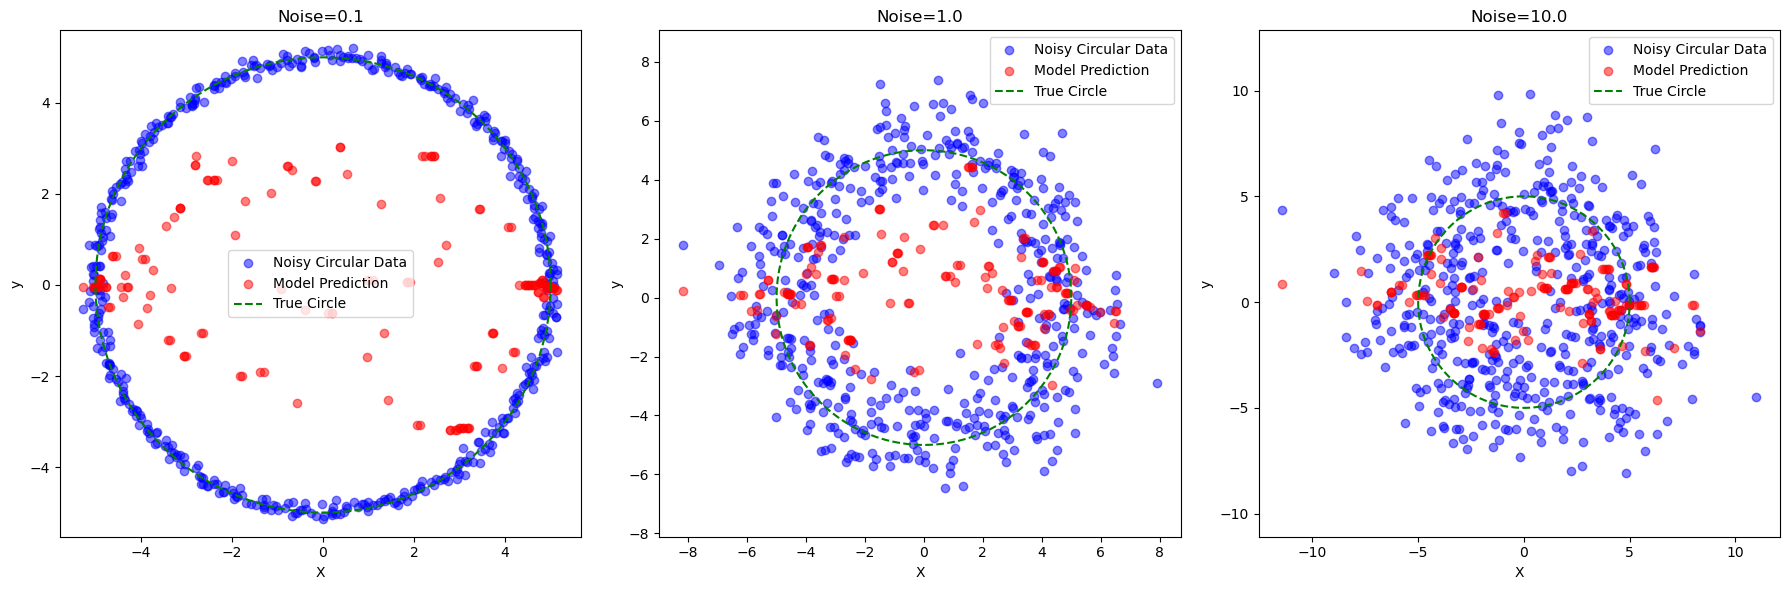

Root Mean Squared Error (RMSE) for noise=0.1: 4.1557
Root Mean Squared Error (RMSE) for noise=1.0: 3.6885
Root Mean Squared Error (RMSE) for noise=10.0: 4.0402


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate circular data with noise
def generate_circular_data(n_samples, noise, random_state, radius=5):
    np.random.seed(random_state)
    theta = np.linspace(0, 2 * np.pi, n_samples)
    x = radius * np.cos(theta) + np.random.normal(0, noise, n_samples)  # Noisy x
    y = radius * np.sin(theta) + np.random.normal(0, noise, n_samples)  # Noisy y
    return x, y

# Generate datasets with increasing noise levels
datasets = [
    generate_circular_data(n_samples=500, noise=noise, random_state=42)
    for noise in [0.1, 1, 2]
]

# Prepare the figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Initialize a list to store the mean squared errors
mse_list = []

# Loop over datasets and noise levels
for i, (x, y) in enumerate(datasets):
    # Combine x and y into a single feature matrix
    X = np.column_stack((x, y))
    
    # Use x as input and y as target for regression
    X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.3, random_state=42)
    
    # Train a Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and store the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    # Plot the noisy circular data
    axs[i].scatter(x, y, color='blue', alpha=0.5, label='Noisy Circular Data')
    axs[i].scatter(X_test, y_pred, color='red', label='Model Prediction', alpha=0.5)
    axs[i].plot(5 * np.cos(np.linspace(0, 2 * np.pi, 500)),
                5 * np.sin(np.linspace(0, 2 * np.pi, 500)),
                color='green', linestyle='--', label='True Circle')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Noise={0.1 * (10 ** i)}')
    axs[i].legend()
    axs[i].axis('equal')  # Ensure aspect ratio is equal

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Calculate and print RMSE
for i, mse in enumerate(mse_list):
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE) for noise={0.1 * (10 ** i)}: {rmse:.4f}")


**As expected, our model performs terribly**. This is a limitation of Gradient Boosting, and is a task better suited for a Neural Network or some other machine learning model.